In [2]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce retail.xlsx to ecommerce retail.xlsx


In [3]:
import pandas as pd
data = pd.read_excel("ecommerce retail.xlsx")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
#delete customerID
data = data.dropna(subset=['CustomerID'], axis=0).drop_duplicates()

In [8]:
data[(data['Quantity']>0)&(data['UnitPrice']>0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [21]:
data['CustomerID'] = data['CustomerID'].astype(int)


In [11]:
#RFM
data["Revenue"]=data["Quantity"]*data["UnitPrice"]

In [22]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [23]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
Revenue               float64
dtype: object

In [25]:
rfm = data.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': pd.Series.nunique, 'Revenue': 'sum'}).reset_index()

In [26]:
rfm

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12346,2011-01-18 10:17:00,2,0.00
1,12347,2011-12-07 15:52:00,7,4310.00
2,12348,2011-09-25 13:13:00,4,1797.24
3,12349,2011-11-21 09:51:00,1,1757.55
4,12350,2011-02-02 16:01:00,1,334.40
...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60
4368,18281,2011-06-12 10:53:00,1,80.82
4369,18282,2011-12-02 11:43:00,3,176.60
4370,18283,2011-12-06 12:02:00,16,2045.53


In [27]:
rfm.columns = ['CustomerID', 'Max_date', 'Frequency', 'Monetary']

In [28]:
rfm

,CustomerID,Max_date,Frequency,Monetary
0,12346,2011-01-18 10:17:00,2,0.00
1,12347,2011-12-07 15:52:00,7,4310.00
2,12348,2011-09-25 13:13:00,4,1797.24
3,12349,2011-11-21 09:51:00,1,1757.55
4,12350,2011-02-02 16:01:00,1,334.40
...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60
4368,18281,2011-06-12 10:53:00,1,80.82
4369,18282,2011-12-02 11:43:00,3,176.60
4370,18283,2011-12-06 12:02:00,16,2045.53


In [30]:
import datetime
today = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')
rfm['Recency'] = (today - rfm['Max_date']).dt.days

In [31]:
rfm


,CustomerID,Max_date,Frequency,Monetary,Recency
0,12346,2011-01-18 10:17:00,2,0.00,346
1,12347,2011-12-07 15:52:00,7,4310.00,23
2,12348,2011-09-25 13:13:00,4,1797.24,96
3,12349,2011-11-21 09:51:00,1,1757.55,39
4,12350,2011-02-02 16:01:00,1,334.40,331
...,...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60,298
4368,18281,2011-06-12 10:53:00,1,80.82,201
4369,18282,2011-12-02 11:43:00,3,176.60,28
4370,18283,2011-12-06 12:02:00,16,2045.53,24


In [32]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 6), range(1, 6)

In [33]:
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

rfm


,CustomerID,Max_date,Frequency,Monetary,Recency,R_score,F_score,M_score
0,12346,2011-01-18 10:17:00,2,0.00,346,1,2,1
1,12347,2011-12-07 15:52:00,7,4310.00,23,5,4,5
2,12348,2011-09-25 13:13:00,4,1797.24,96,2,3,4
3,12349,2011-11-21 09:51:00,1,1757.55,39,4,1,4
4,12350,2011-02-02 16:01:00,1,334.40,331,1,1,2
...,...,...,...,...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60,298,1,2,1
4368,18281,2011-06-12 10:53:00,1,80.82,201,1,2,1
4369,18282,2011-12-02 11:43:00,3,176.60,28,5,3,1
4370,18283,2011-12-06 12:02:00,16,2045.53,24,5,5,5


In [51]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)
rfm

,CustomerID,Max_date,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score
0,12346,2011-01-18 10:17:00,2,0.00,346,1,2,1,121
1,12347,2011-12-07 15:52:00,7,4310.00,23,5,4,5,545
2,12348,2011-09-25 13:13:00,4,1797.24,96,2,3,4,234
3,12349,2011-11-21 09:51:00,1,1757.55,39,4,1,4,414
4,12350,2011-02-02 16:01:00,1,334.40,331,1,1,2,112
...,...,...,...,...,...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60,298,1,2,1,121
4368,18281,2011-06-12 10:53:00,1,80.82,201,1,2,1,121
4369,18282,2011-12-02 11:43:00,3,176.60,28,5,3,1,531
4370,18283,2011-12-06 12:02:00,16,2045.53,24,5,5,5,555


In [35]:
seg = pd.read_excel( 'ecommerce retail.xlsx', sheet_name='Segmentation')


In [36]:
seg.columns = [col.replace(' ', '_') for col in seg.columns]
seg['RFM_Score'] = seg['RFM_Score'].str.split(',') # convert comma-separated string to a list of rfm scores
seg = seg.explode('RFM_Score').reset_index(drop=True) # transform each element of a list-like to a row
seg['RFM_Score'] = seg['RFM_Score'].astype(int)
seg.sort_values(by='RFM_Score')

,Segment,RFM_Score
119,Lost customers,111
120,Lost customers,112
107,Cannot Lose Them,113
106,Cannot Lose Them,114
105,Cannot Lose Them,115
...,...,...
16,Potential Loyalist,551
17,Potential Loyalist,552
15,Potential Loyalist,553
1,Champions,554


In [37]:
joined = rfm.merge(seg, how='left', on='RFM_Score')
joined


,CustomerID,Max_date,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_Score,Segment
0,12346,2011-01-18 10:17:00,2,0.00,346,1,2,1,121,Lost customers
1,12347,2011-12-07 15:52:00,7,4310.00,23,5,4,5,545,Champions
2,12348,2011-09-25 13:13:00,4,1797.24,96,2,3,4,234,At Risk
3,12349,2011-11-21 09:51:00,1,1757.55,39,4,1,4,414,Promising
4,12350,2011-02-02 16:01:00,1,334.40,331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...,...
4367,18280,2011-03-07 09:52:00,1,180.60,298,1,2,1,121,Lost customers
4368,18281,2011-06-12 10:53:00,1,80.82,201,1,2,1,121,Lost customers
4369,18282,2011-12-02 11:43:00,3,176.60,28,5,3,1,531,Potential Loyalist
4370,18283,2011-12-06 12:02:00,16,2045.53,24,5,5,5,555,Champions


<ipython-input-38-a49f1e8883c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


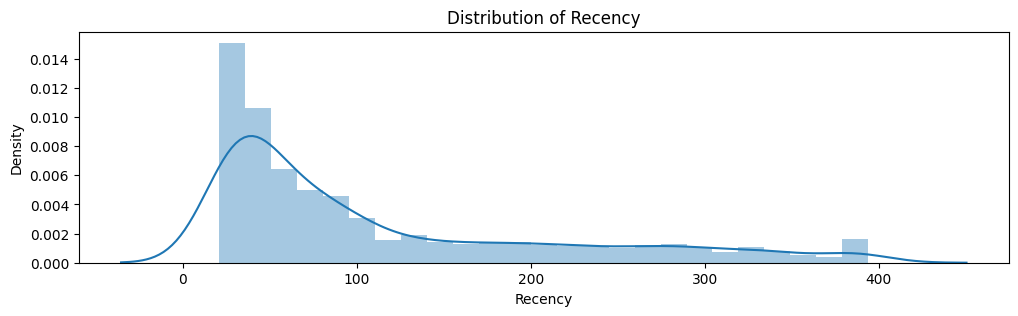

<ipython-input-38-a49f1e8883c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


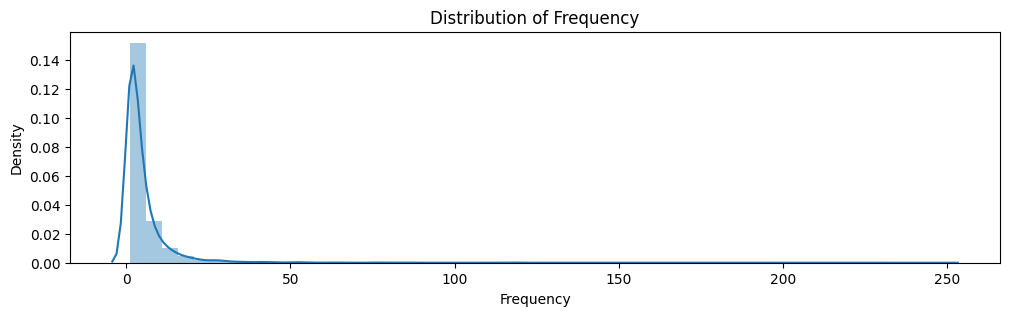

<ipython-input-38-a49f1e8883c2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col])


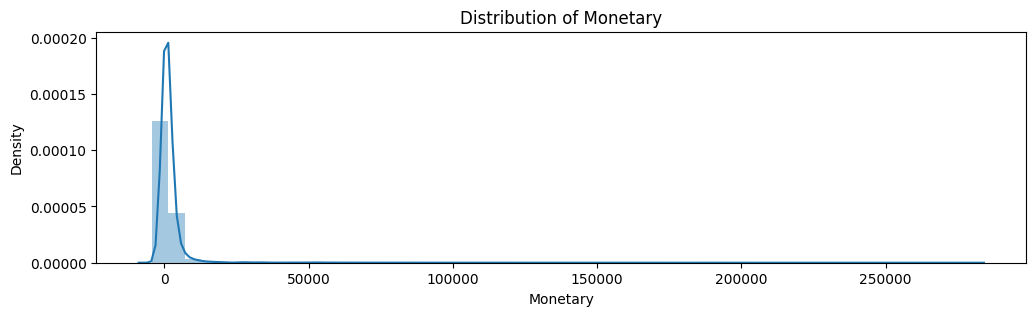

In [38]:
# show distribution of each variable of the model
import matplotlib.pyplot as plt
import seaborn as sns
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(joined[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()


 Phân bố gần đây:Recency

Đây dường như là sự phân bổ lệch phải, cho thấy hầu hết khách hàng đã tương tác gần đây với doanh nghiệp (giá trị gần đây thấp).
Có một cái đuôi dài tượng trưng cho những khách hàng không tương tác trong một thời gian dài (giá trị gần đây cao).
Điều này có thể giúp xác định những khách hàng đang hoạt động gần đây để nhắm mục tiêu cho các chiến dịch khuyến mãi hoặc tương tác lại, cũng như những khách hàng không hoạt động có thể cần nỗ lực giành lại.

 Phân bố tần số:Frequency

Đây có thể là sự phân bố tần suất mua hàng hoặc tương tác của khách hàng.
Hình dạng nghiêng phải cho thấy hầu hết khách hàng tương tác không thường xuyên, trong khi một phân khúc nhỏ hơn thể hiện hành vi tần suất cao.
Điều này có thể hướng dẫn các sáng kiến nhằm tăng tần suất mua hàng của những người mua không thường xuyên thông qua các ưu đãi đặc biệt hoặc mô hình đăng ký, đồng thời đáp ứng nhu cầu của những khách hàng có mức độ tương tác cao.

Nhìn chung, các phân phối này cung cấp thông tin chi tiết về hành vi và giá trị của khách hàng, cho phép phân khúc có mục tiêu hơn và chiến lược tiếp thị phù hợp với các nhóm khách hàng khác nhau dựa trên lần truy cập gần đây, giá trị tiền tệ và tần suất tương tác với doanh nghiệp của họ.

 Phân phối tiền tệ:Monetary

Sự phân bổ này dường như cũng bị lệch phải, cho thấy rằng hầu hết khách hàng có giá trị tiền tệ thấp hơn (có thể mua hàng với số lượng nhỏ hơn).
Có một cái đuôi dài đại diện cho một phân khúc nhỏ hơn gồm những khách hàng có giá trị cao đóng góp đáng kể vào doanh thu.
Điều này có thể cung cấp thông tin về các chiến lược nhằm khuyến khích số lượng lớn khách hàng có giá trị thấp hơn chi tiêu nhiều hơn, cũng như tập trung nỗ lực để giữ chân những khách hàng có giá trị chi tiêu cao.


In [55]:
# Extract RFM scores for K-means clustering
X = rfm[['R_score', 'F_score', 'M_score']]
X

,R_score,F_score,M_score
0,1,2,1
1,5,4,5
2,2,3,4
3,4,1,4
4,1,1,2
...,...,...,...
4367,1,2,1
4368,1,2,1
4369,5,3,1
4370,5,5,5


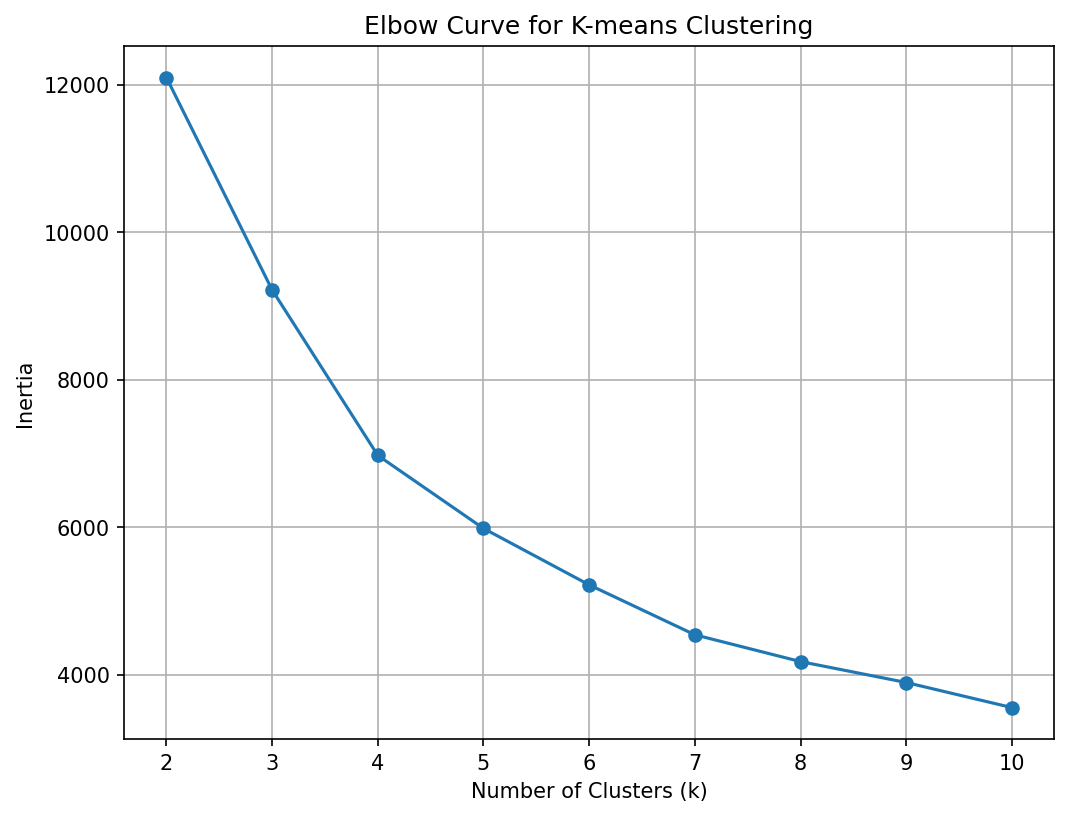

In [57]:
# Calculate inertia (sum of squared distances) for different values of k
# tìm k tối ưu(phân cụm)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6),dpi=150)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.grid(True)
plt.show()

In [61]:
# k=4
# Perform K-means clustering with best K
best_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
rfm['Cluster'] = best_kmeans.fit_predict(X)


In [70]:
# Group by cluster and calculate mean values
rfm['Cluster'] = rfm['Cluster'].astype('int64')
rfm['R_score'] = rfm['R_score'].astype('int64')
rfm['F_score'] = rfm['F_score'].astype('int64')
rfm['M_score'] = rfm['M_score'].astype('int64')
cluster_summary = rfm.groupby('Cluster').agg({
    'R_score': 'median',
    'F_score': 'median',
    'M_score': 'median'
}).reset_index()
print(cluster_summary)

   Cluster  R_score  F_score  M_score
0        0      4.0      2.0      2.0
1        1      5.0      5.0      5.0
2        2      1.0      2.0      2.0
3        3      2.0      4.0      4.0


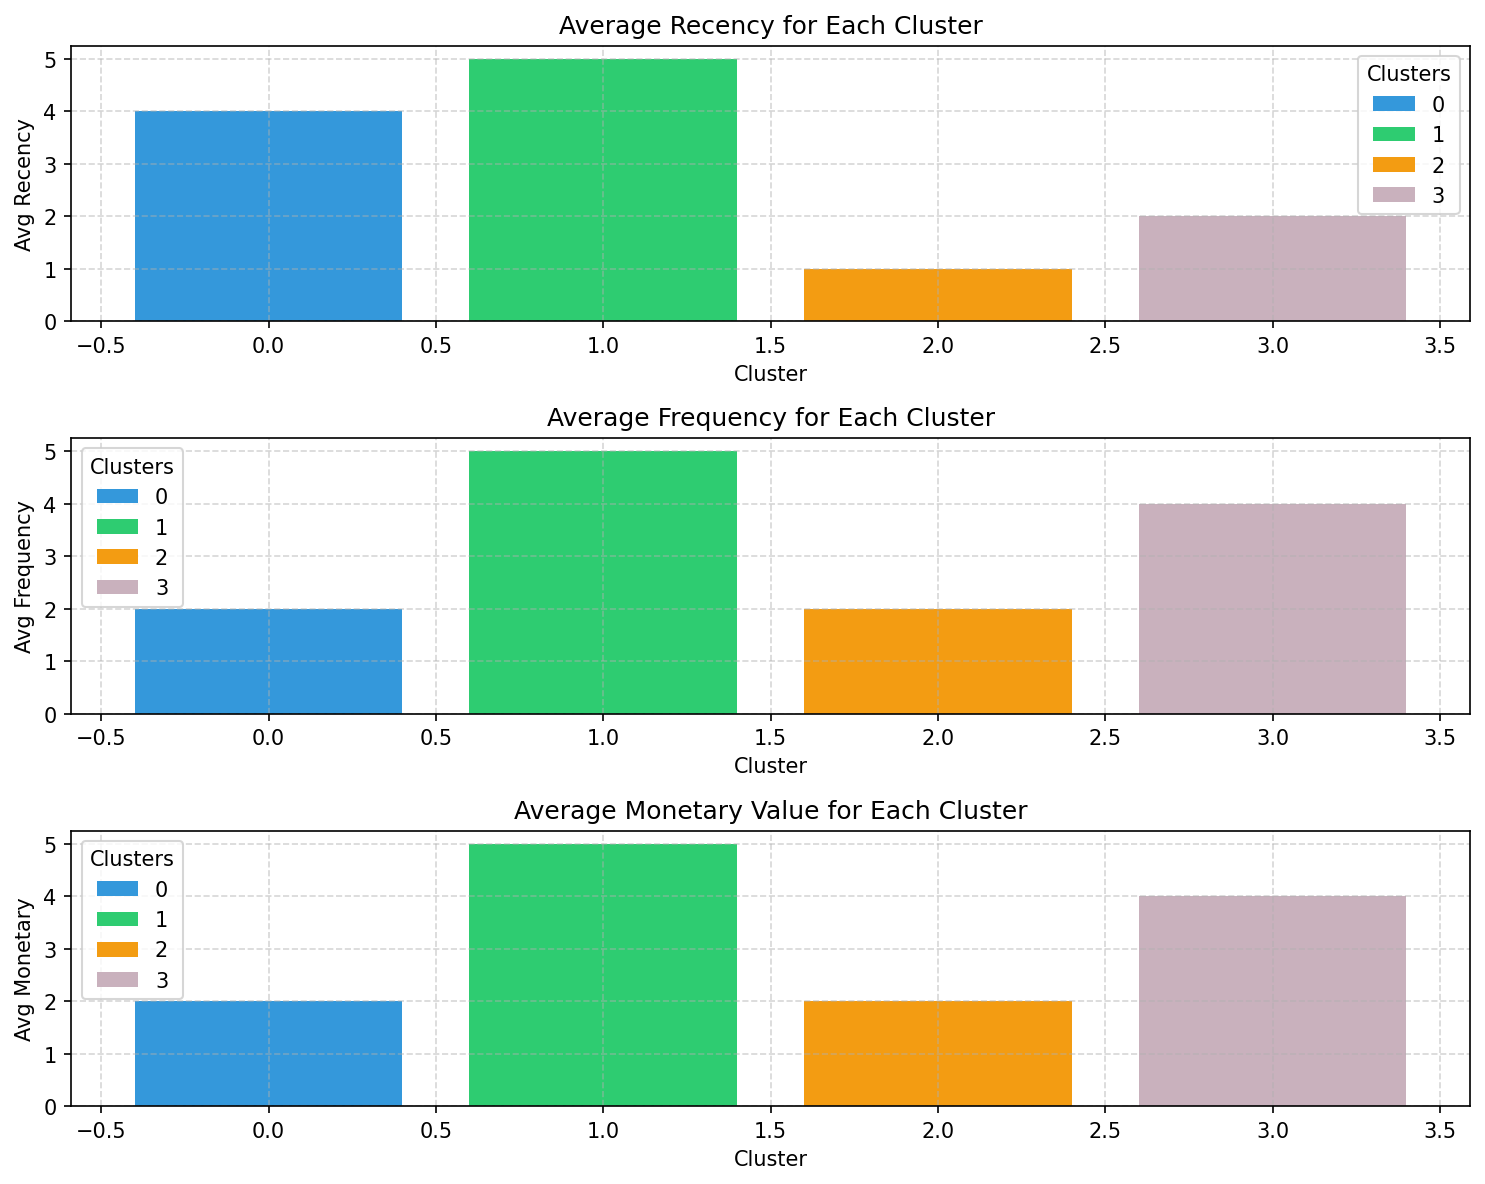

In [71]:
colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 8),dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary.index, cluster_summary['R_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary.index, cluster_summary['F_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary.index, cluster_summary['M_score'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary.index, title='Clusters')

plt.tight_layout()
plt.show()


Cụm 0 : Trong tất cả bốn cụm, cụm này có giá trị gần đây, tần suất và tiền tệ cao nhất . Hãy gọi những khách hàng trong cụm này là khách hàng vip.

Cụm 1 : Cụm này được đặc trưng bởi mức độ gần đây, tần suất và giá trị tiền tệ vừa phải . Những khách hàng này vẫn chi tiêu nhiều hơn và mua hàng thường xuyên hơn cụm 2 và 3. Hãy gọi họ là khách hàng trung thành .

Cụm 2 : Khách hàng ở cụm này có xu hướng chi tiêu ít hơn. Họ không mua thường xuyên và gần đây cũng không mua hàng. Đây có thể là những khách hàng không hoạt động hoặc có nguy cơ gặp rủi ro .

Cụm 3 : Cụm này được đặc trưng bởi mức độ gần đây cao , tần suất tương đối thấp hơn và giá trị tiền tệ vừa phải. Vì vậy, đây là những khách hàng mới có tiềm năng trở thành khách hàng lâu dài.

 -Dành cho khách hàng vip : Cung cấp các khoản giảm giá đặc biệt dành riêng cho cá nhân, quyền truy cập sớm và các đặc quyền cao cấp khác để khiến họ cảm thấy được trân trọng và đánh giá cao.

-Dành cho khách hàng trung thành : Các chiến dịch đánh giá cao, tiền thưởng giới thiệu và phần thưởng cho lòng trung thành.

 -Dành cho khách hàng gặp rủi ro : Các nỗ lực thu hút lại bao gồm việc thực hiện giảm giá hoặc khuyến mại để khuyến khích mua hàng.

 -Dành cho khách hàng gần đây : Các chiến dịch được nhắm mục tiêu nhằm giáo dục họ về thương hiệu và giảm giá cho những lần mua hàng tiếp theo.

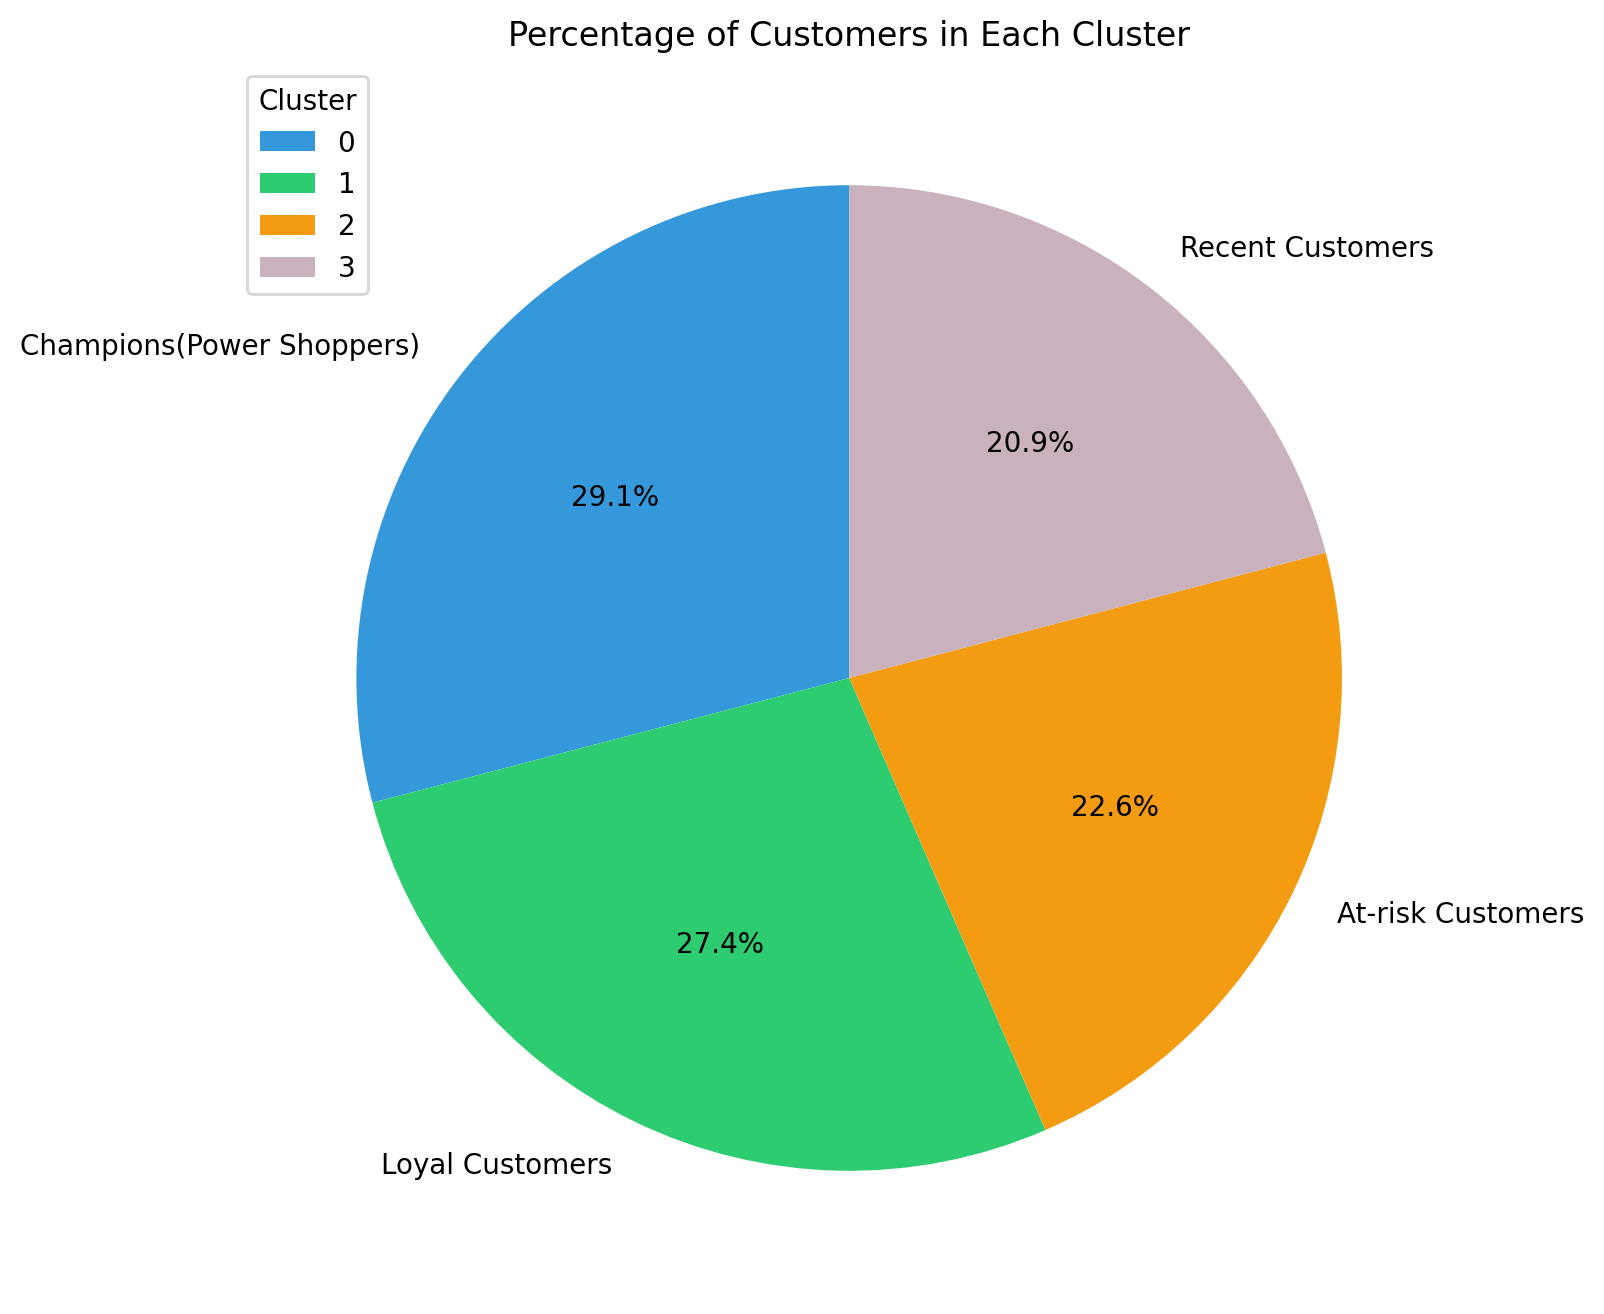

In [72]:
#biểu thị bằng pie_chart
cluster_counts = rfm['Cluster'].value_counts()

colors = ['#3498db', '#2ecc71', '#f39c12','#C9B1BD']
# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

labels = ['Champions(Power Shoppers)','Loyal Customers','At-risk Customers','Recent Customers']

# Create a pie chart
plt.figure(figsize=(8, 8),dpi=200)
plt.pie(percentage_customers, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
plt.legend(cluster_summary['Cluster'], title='Cluster', loc='upper left')

plt.show()